## Imports

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
prison_sentences = pd.read_csv('./data/prison_sentences.csv')
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

C:\Users\ragal\AppData\Local\Temp\ipykernel_18936\2448589007.py:1: DtypeWarning: Columns (100,152,162,181,201,206,211,216,221,223,240,252,257,264,269,276,279,281,288,291,293,329,334,335,336,337,338,339,340,341,342,343,344,345,346,347,356,357,358,362,363,367,368,369,370,371,372,373,374,375,378,379,380,381,382,383,384,385,386,387,388,389,390,395,396,397,398,399,400,401,402,405,406,407,408,409,410,411,412,413,414,415,416,417,422,423,424,533,534,535,536,537,538,540,541,542,543,544,546,547,549,550,552,553) have mixed types. Specify dtype option on import or set low_memory=False.
  prison_sentences = pd.read_csv('./data/prison_sentences.csv')


Shape:  (595850, 557)
Columns:  Index(['CIRCDIST', 'CASLGKY', 'SAFETY', 'ZONE', 'AMTFINEC', 'AMTREST',
       'AMTTOTAL', 'COSTSUP', 'FINE', 'TOTREST',
       ...
       'Degree4', 'DegreeYear4', 'School5', 'Degree5', 'DegreeYear5',
       'ProfessionalCareer', 'OtherNominations/RecessAppointments', 'STARTYR',
       'ENDYR', 'DataSource'],
      dtype='object', length=557)


,CIRCDIST,CASLGKY,SAFETY,ZONE,AMTFINEC,AMTREST,AMTTOTAL,COSTSUP,FINE,TOTREST,...,Degree4,DegreeYear4,School5,Degree5,DegreeYear5,ProfessionalCareer,OtherNominations/RecessAppointments,STARTYR,ENDYR,DataSource
0,1,009011100123CR0,NaN,D,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
1,1,009011100141CR0,NaN,B,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
2,1,009011100169CR0,NaN,B,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
3,1,009011100196CR0,NaN,D,0.0,469869.0,469869.0,0.0,0.0,469869.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
4,1,009011100206CR0,NaN,D,0.0,99158.0,99158.0,0.0,0.0,99158.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1


## Data selection

In [56]:
cols_to_use = {
    'CIRCDIST': 'courtDistrict_id',
    'SAFETY': 'drugCase_safetyValve',
    'ZONE': 'sentence_zone',
    'COSTSUP': 'supervision_cost',
    'TOTREST': 'restitution_cost',
    'FINE': 'fine_cost',
    'SENTTOT': 'prisonSentence_months',
    'AGE': 'defendant_age',
    'CHAP2': 'offenseLevel_plusChapter2SOCs',
    'CITIZEN': 'citizenship_status',
    'CRIMHIST': 'defendant_has_criminalHistory',
    'CRIMPTS': 'criminalHistoryPoints_subtotal',
    'DISPOSIT': 'defendant_disposition',
    'DRUGTYP1': 'drug_types',
    'DSPLEA': 'pleaAgreement_documentStatus',
    'EDUCATN': 'defendant_educationLevel',
    'MONRACE': 'defendant_race',
    'MONSEX': 'defendant_gender',
    'POINT1': 'defendantSentences_last60days',
    'PRISDUM': 'received_prison_sentence',
    'PROBATN': 'probationSentence_months',
    'SENTIMP': 'sentence_type',
    'TOTCHPTS': 'criminalHistoryPoints_applied',
    'TOTUNIT': 'multipleOffense_unitsAdjustment',
    'WEAPON': 'SOC_weaponEnhancement',
    'STATMIN': 'statutoryPrisonTerm_min',
    'STATMAX': 'statutoryPrisonTerm_max',
    'SENTYR': 'sentence_year',
    'FILEDATE': 'case_filling_date',
    'appointedby': 'judge_appointedBy',
    'CourtName1': 'court_name',
    'Gender': 'judge_gender',
    'ACCAP': 'armedCareerCriminal_status',
    'SUPREL': 'supervisedRelease_months',
    'SUPVREL1': 'supervisedRelease_underUSCode',
    'FINEAMT1': 'fine_cost_underUSCode',
    'DISP1': 'USCode_dispositionType',
    'PRISTIM1': 'prisonSentence_months_underUSCode',
}

In [57]:
prison_sentences = prison_sentences[list(cols_to_use.keys())]
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

Shape:  (595850, 38)
Columns:  Index(['CIRCDIST', 'SAFETY', 'ZONE', 'COSTSUP', 'TOTREST', 'FINE', 'SENTTOT',
       'AGE', 'CHAP2', 'CITIZEN', 'CRIMHIST', 'CRIMPTS', 'DISPOSIT',
       'DRUGTYP1', 'DSPLEA', 'EDUCATN', 'MONRACE', 'MONSEX', 'POINT1',
       'PRISDUM', 'PROBATN', 'SENTIMP', 'TOTCHPTS', 'TOTUNIT', 'WEAPON',
       'STATMIN', 'STATMAX', 'SENTYR', 'FILEDATE', 'appointedby', 'CourtName1',
       'Gender', 'ACCAP', 'SUPREL', 'SUPVREL1', 'FINEAMT1', 'DISP1',
       'PRISTIM1'],
      dtype='object')


,CIRCDIST,SAFETY,ZONE,COSTSUP,TOTREST,FINE,SENTTOT,AGE,CHAP2,CITIZEN,...,FILEDATE,appointedby,CourtName1,Gender,ACCAP,SUPREL,SUPVREL1,FINEAMT1,DISP1,PRISTIM1
0,1,NaN,D,0.0,0.0,0.0,24.0,26.0,24.0,3.0,...,04/26/2011,Obama,U.S. District Court for the District of Columbia,Female,0.0,36.0,36,0.0,4,24
1,1,NaN,B,0.0,0.0,0.0,8.0,29.0,12.0,3.0,...,05/10/2011,Obama,U.S. District Court for the District of Columbia,Female,0.0,36.0,36,0.0,4,8
2,1,NaN,B,0.0,0.0,0.0,3.0,36.0,8.0,3.0,...,05/26/2011,Obama,U.S. District Court for the District of Columbia,Female,0.0,12.0,12,0.0,4,3
3,1,NaN,D,0.0,469869.0,0.0,6.0,61.0,22.0,1.0,...,06/20/2011,Obama,U.S. District Court for the District of Columbia,Female,0.0,36.0,36,0.0,4,6
4,1,NaN,D,0.0,99158.0,0.0,18.0,43.0,14.0,1.0,...,06/29/2011,Obama,U.S. District Court for the District of Columbia,Female,0.0,36.0,36,0.0,4,18


In [58]:
prison_sentences = prison_sentences.rename(columns=cols_to_use)
print(prison_sentences.columns)

Index(['courtDistrict_id', 'drugCase_safetyValve', 'sentence_zone',
       'supervision_cost', 'restitution_cost', 'fine_cost',
       'prisonSentence_months', 'defendant_age',
       'offenseLevel_plusChapter2SOCs', 'citizenship_status',
       'defendant_has_criminalHistory', 'criminalHistoryPoints_subtotal',
       'defendant_disposition', 'drug_types', 'pleaAgreement_documentStatus',
       'defendant_educationLevel', 'defendant_race', 'defendant_gender',
       'defendantSentences_last60days', 'received_prison_sentence',
       'probationSentence_months', 'sentence_type',
       'criminalHistoryPoints_applied', 'multipleOffense_unitsAdjustment',
       'SOC_weaponEnhancement', 'statutoryPrisonTerm_min',
       'statutoryPrisonTerm_max', 'sentence_year', 'case_filling_date',
       'judge_appointedBy', 'court_name', 'judge_gender',
       'armedCareerCriminal_status', 'supervisedRelease_months',
       'supervisedRelease_underUSCode', 'fine_cost_underUSCode',
       'USCode_disposi

## Feature engineering

In [ ]:
# nan values are actually 0 (valve wasn't applied) for this feature
prison_sentences['drugCase_safetyValve'] = prison_sentences['drugCase_safetyValve'].apply(lambda x: x if x > 0 else 0)

In [ ]:
# similar case here: when no drug types are registered, that means the feature is 0
prison_sentences['drug_types'] = prison_sentences['drug_types'].fillna(0)

In [61]:
# dropping rows with nans
prison_sentences.dropna(inplace=True, axis=0, how='any')

Probably the political leaning of judges could be relevant

In [62]:
president_parties = {
    'Obama': 'Democrat',
    'Clinton': 'Democrat',
    'G.W. Bush': 'Republican',
    'Carter': 'Democrat',
    'Reagan': 'Republican',
    'Trump': 'Republican',
    'G.H.W. Bush': 'Republican',
    'Nixon': 'Republican',
    'L. Johnson': 'Democrat',
    'Eisenhower': 'Republican',
    'Ford': 'Republican',
    'Kennedy': 'Democrat',
    'Eisenhower Nixon': 'Republican',   # Both Eisenhower and Nixon were Republicans
    'Operation of law': 'None'          # This case is not applicable to a president
}

In [63]:
# political leaning of the judge based on the president who appointed them:
# 0 if they were not appointed by a president (Operation of law)
# 1 if appointed by a Republican president
# -1 if appointed by a Democrat president
prison_sentences['judge_appointment_politicalLeaning'] = \
    prison_sentences['judge_appointedBy'].apply(lambda x: 0 if x == 'Operation of law' else 1) * \
    prison_sentences['judge_appointedBy'].apply(lambda x: 1 if president_parties[x] == 'Republican' else -1)
prison_sentences.drop(columns=['judge_appointedBy'], inplace=True)

Most registers have a null (zero) supervision cost, so keeping it as a boolean may be more precise.

In [64]:
prison_sentences['has_supervisionCost'] = prison_sentences['supervision_cost'].apply(lambda x: 1 if x > 0 else 0)
prison_sentences.drop(columns=['supervision_cost'], inplace=True)

In [65]:
object_cols = prison_sentences.select_dtypes(include='object').columns.tolist()
print(f"Object columns: {object_cols}\n")

for col in object_cols:
    print(f"Unique values in '{col}':")
    print(f"Number of unique values: {prison_sentences[col].nunique()}")
    print(prison_sentences[col].unique())
    print("-" * 50)

# written by Claude Sonnet 4 in Copilot using the following prompt:
# "Print all unique values in columns of type object"

Object columns: ['sentence_zone', 'case_filling_date', 'court_name', 'judge_gender']

Unique values in 'sentence_zone':
Number of unique values: 4
['D' 'B' 'C' 'A']
--------------------------------------------------
Unique values in 'case_filling_date':
Number of unique values: 5627
['04/26/2011' '05/10/2011' '05/26/2011' ... '05/08/1991' '02/15/2003'
 '08/05/1994']
--------------------------------------------------
Unique values in 'court_name':
Number of unique values: 85
['U.S. District Court for the District of Columbia'
 'U.S. District Court for the District of Maine'
 'U.S. District Court for the District of Massachusetts'
 'U.S. District Court for the District of New Hampshire'
 'U.S. District Court for the District of Puerto Rico'
 'U.S. District Court for the District of Rhode Island'
 'U.S. District Court for the District of Connecticut'
 'U.S. District Court for the Eastern District of New York'
 'U.S. District Court for the Northern District of New York'
 'U.S. District Cou

In [66]:
prison_sentences['judge_isFemale'] = prison_sentences['judge_gender'].apply(lambda x: 1 if x == 'Female' else 0)
prison_sentences.drop(columns=['judge_gender'], inplace=True)

In [67]:
prison_sentences['case_filling_date'] = pd.to_datetime(prison_sentences['case_filling_date'], format='%m/%d/%Y', errors='coerce')

## Basic EDA

In [75]:
categorical_features = [
    'sentence_zone',
    'courtDistrict_id',
    'court_name',
    'USCode_dispositionType',
    'sentence_type',
    'citizenship_status',
    'defendant_disposition',
    'pleaAgreement_documentStatus',
    'defendant_race',
]
for col in categorical_features:
    prison_sentences[col] = prison_sentences[col].astype('category')

In [89]:
binary_features = [
    'drugCase_safetyValve',
    'defendant_has_criminalHistory',
    'defendant_gender',
    'received_prison_sentence',
    'SOC_weaponEnhancement',
    'armedCareerCriminal_status',
    'has_supervisionCost',
    'judge_isFemale'
]

In [90]:
num_cols = [col for col in prison_sentences.columns if col not in categorical_features and col not in binary_features]

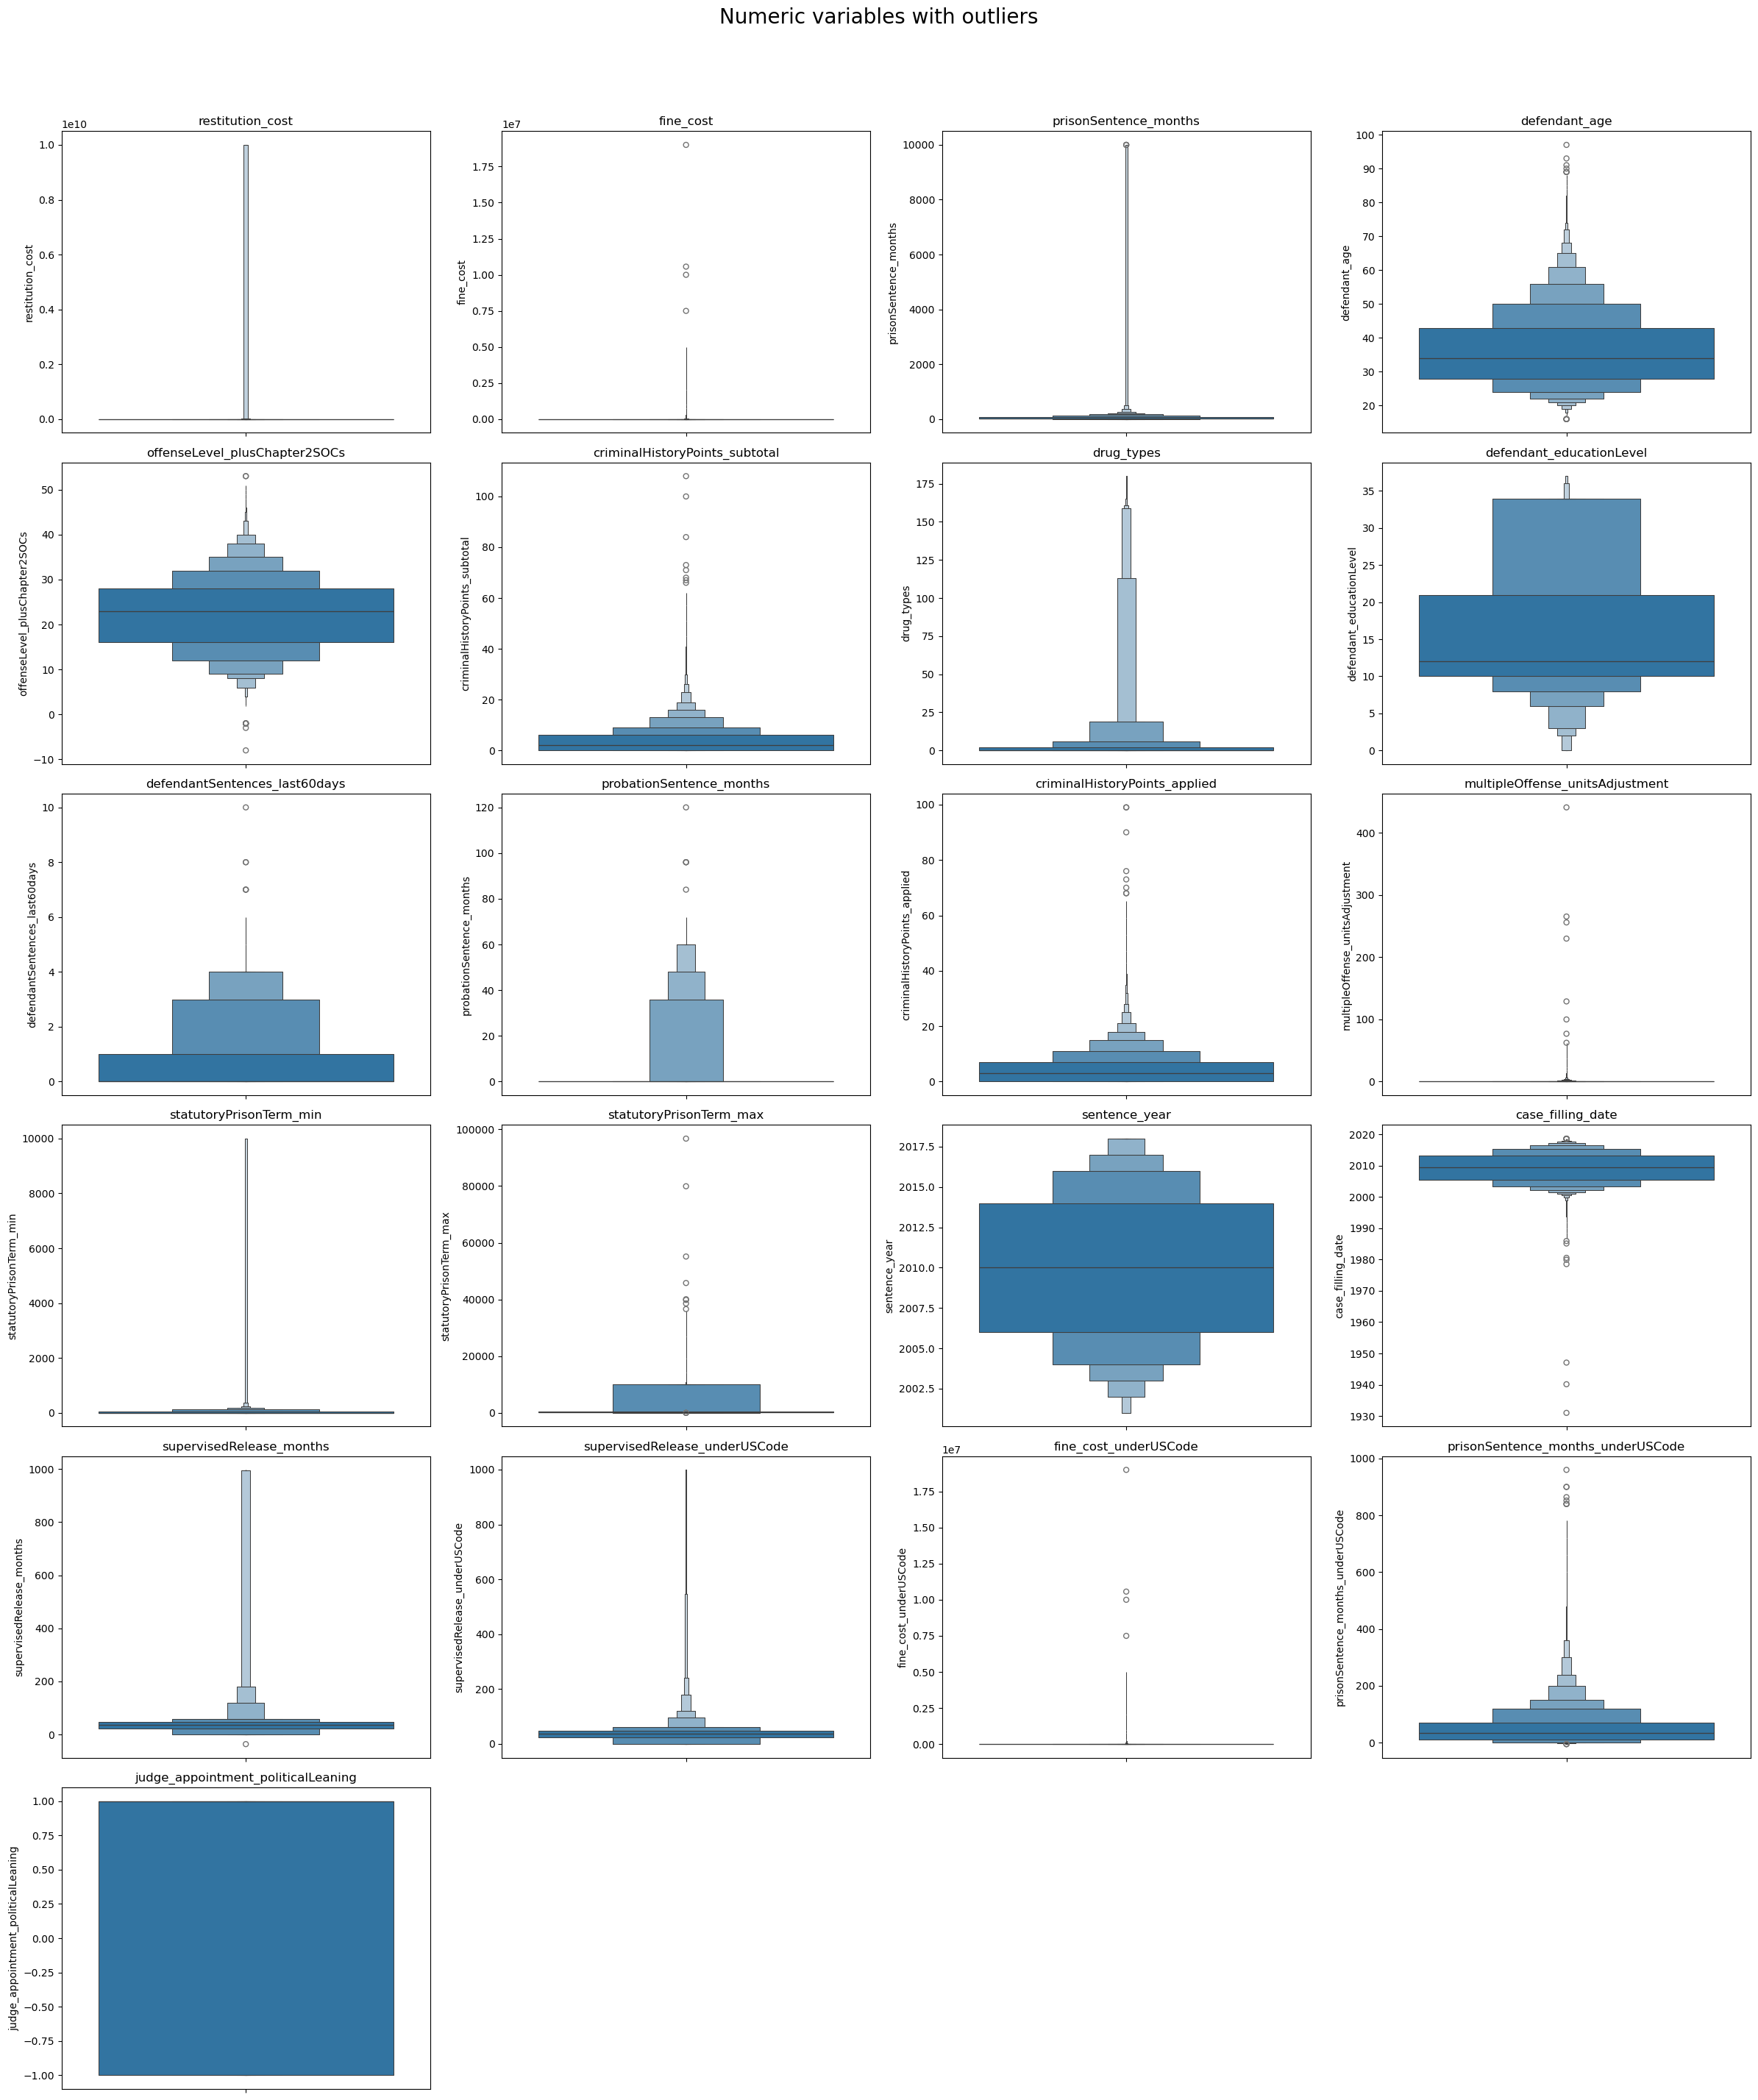

In [78]:
# boxen plots of unfiltered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxenplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables with outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

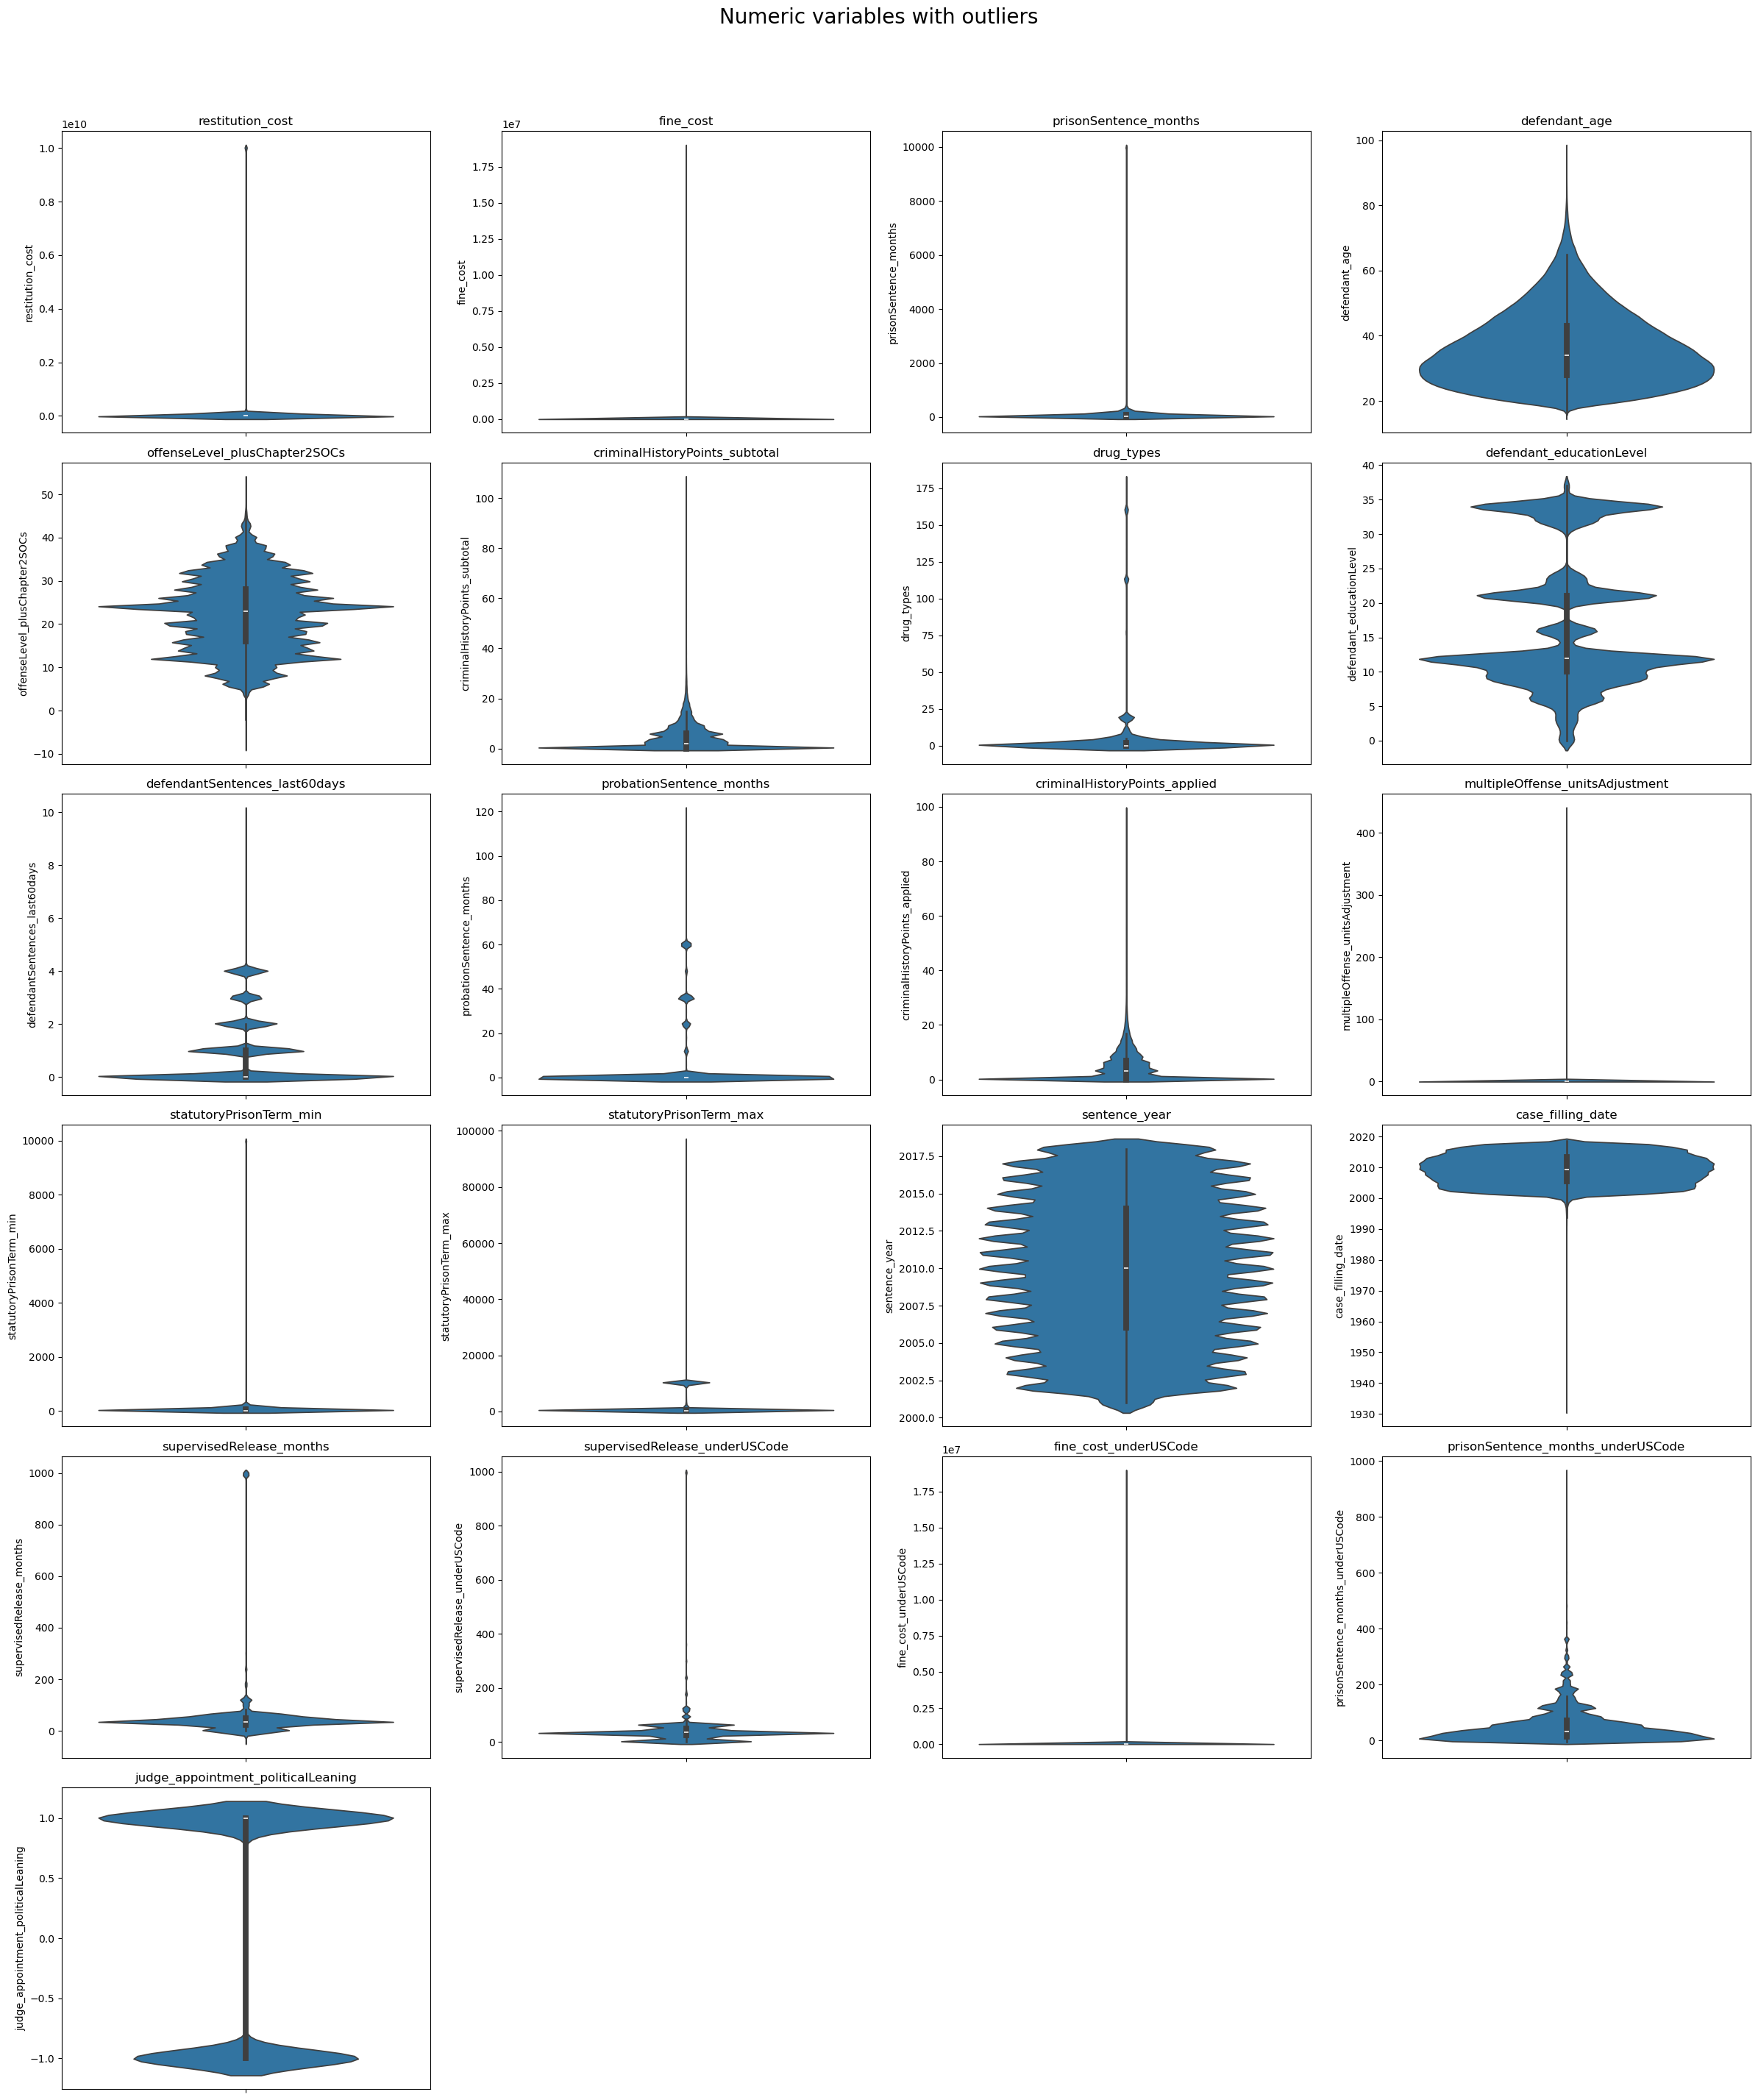

In [79]:
# violin plots of unfiltered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.violinplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables with outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Outrageous outlier cleanup

In [92]:
# deleting terrible outliers
outlier_thresholds = {
    'restitution_cost': {
        'lower': 0,
        'upper': 100000
    },
    'fine_cost': {
        'lower': 0,
        'upper': 40000
    },
    'prisonSentence_months': {
        'lower': 0,
        'upper': 1000
    },
    'statutoryPrisonTerm_min': {
        'lower': 0,
        'upper': 1000
    },
    'statutoryPrisonTerm_max': {
        'lower': 0,
        'upper': 2000
    },
    'supervisedRelease_months': {
        'lower': 0,
        'upper': 300
    },
    'supervisedRelease_underUSCode': {
        'lower': 0,
        'upper': 300
    },
    'fine_cost_underUSCode': {
        'lower': 0,
        'upper': 10000000
    },
    'prisonSentence_months_underUSCode': {
        'lower': 0,
        'upper': 400
    },
    'multipleOffense_unitsAdjustment': {
        'lower': 0,
        'upper': 30
    },
    'case_filling_date': {
        'lower': pd.Timestamp('1990-01-01'),
        'upper': pd.Timestamp('2100-12-31')
    }
}

In [93]:
for col, thresholds in outlier_thresholds.items():
    prison_sentences = prison_sentences[
        (prison_sentences[col] >= thresholds['lower']) & 
        (prison_sentences[col] <= thresholds['upper'])
    ]

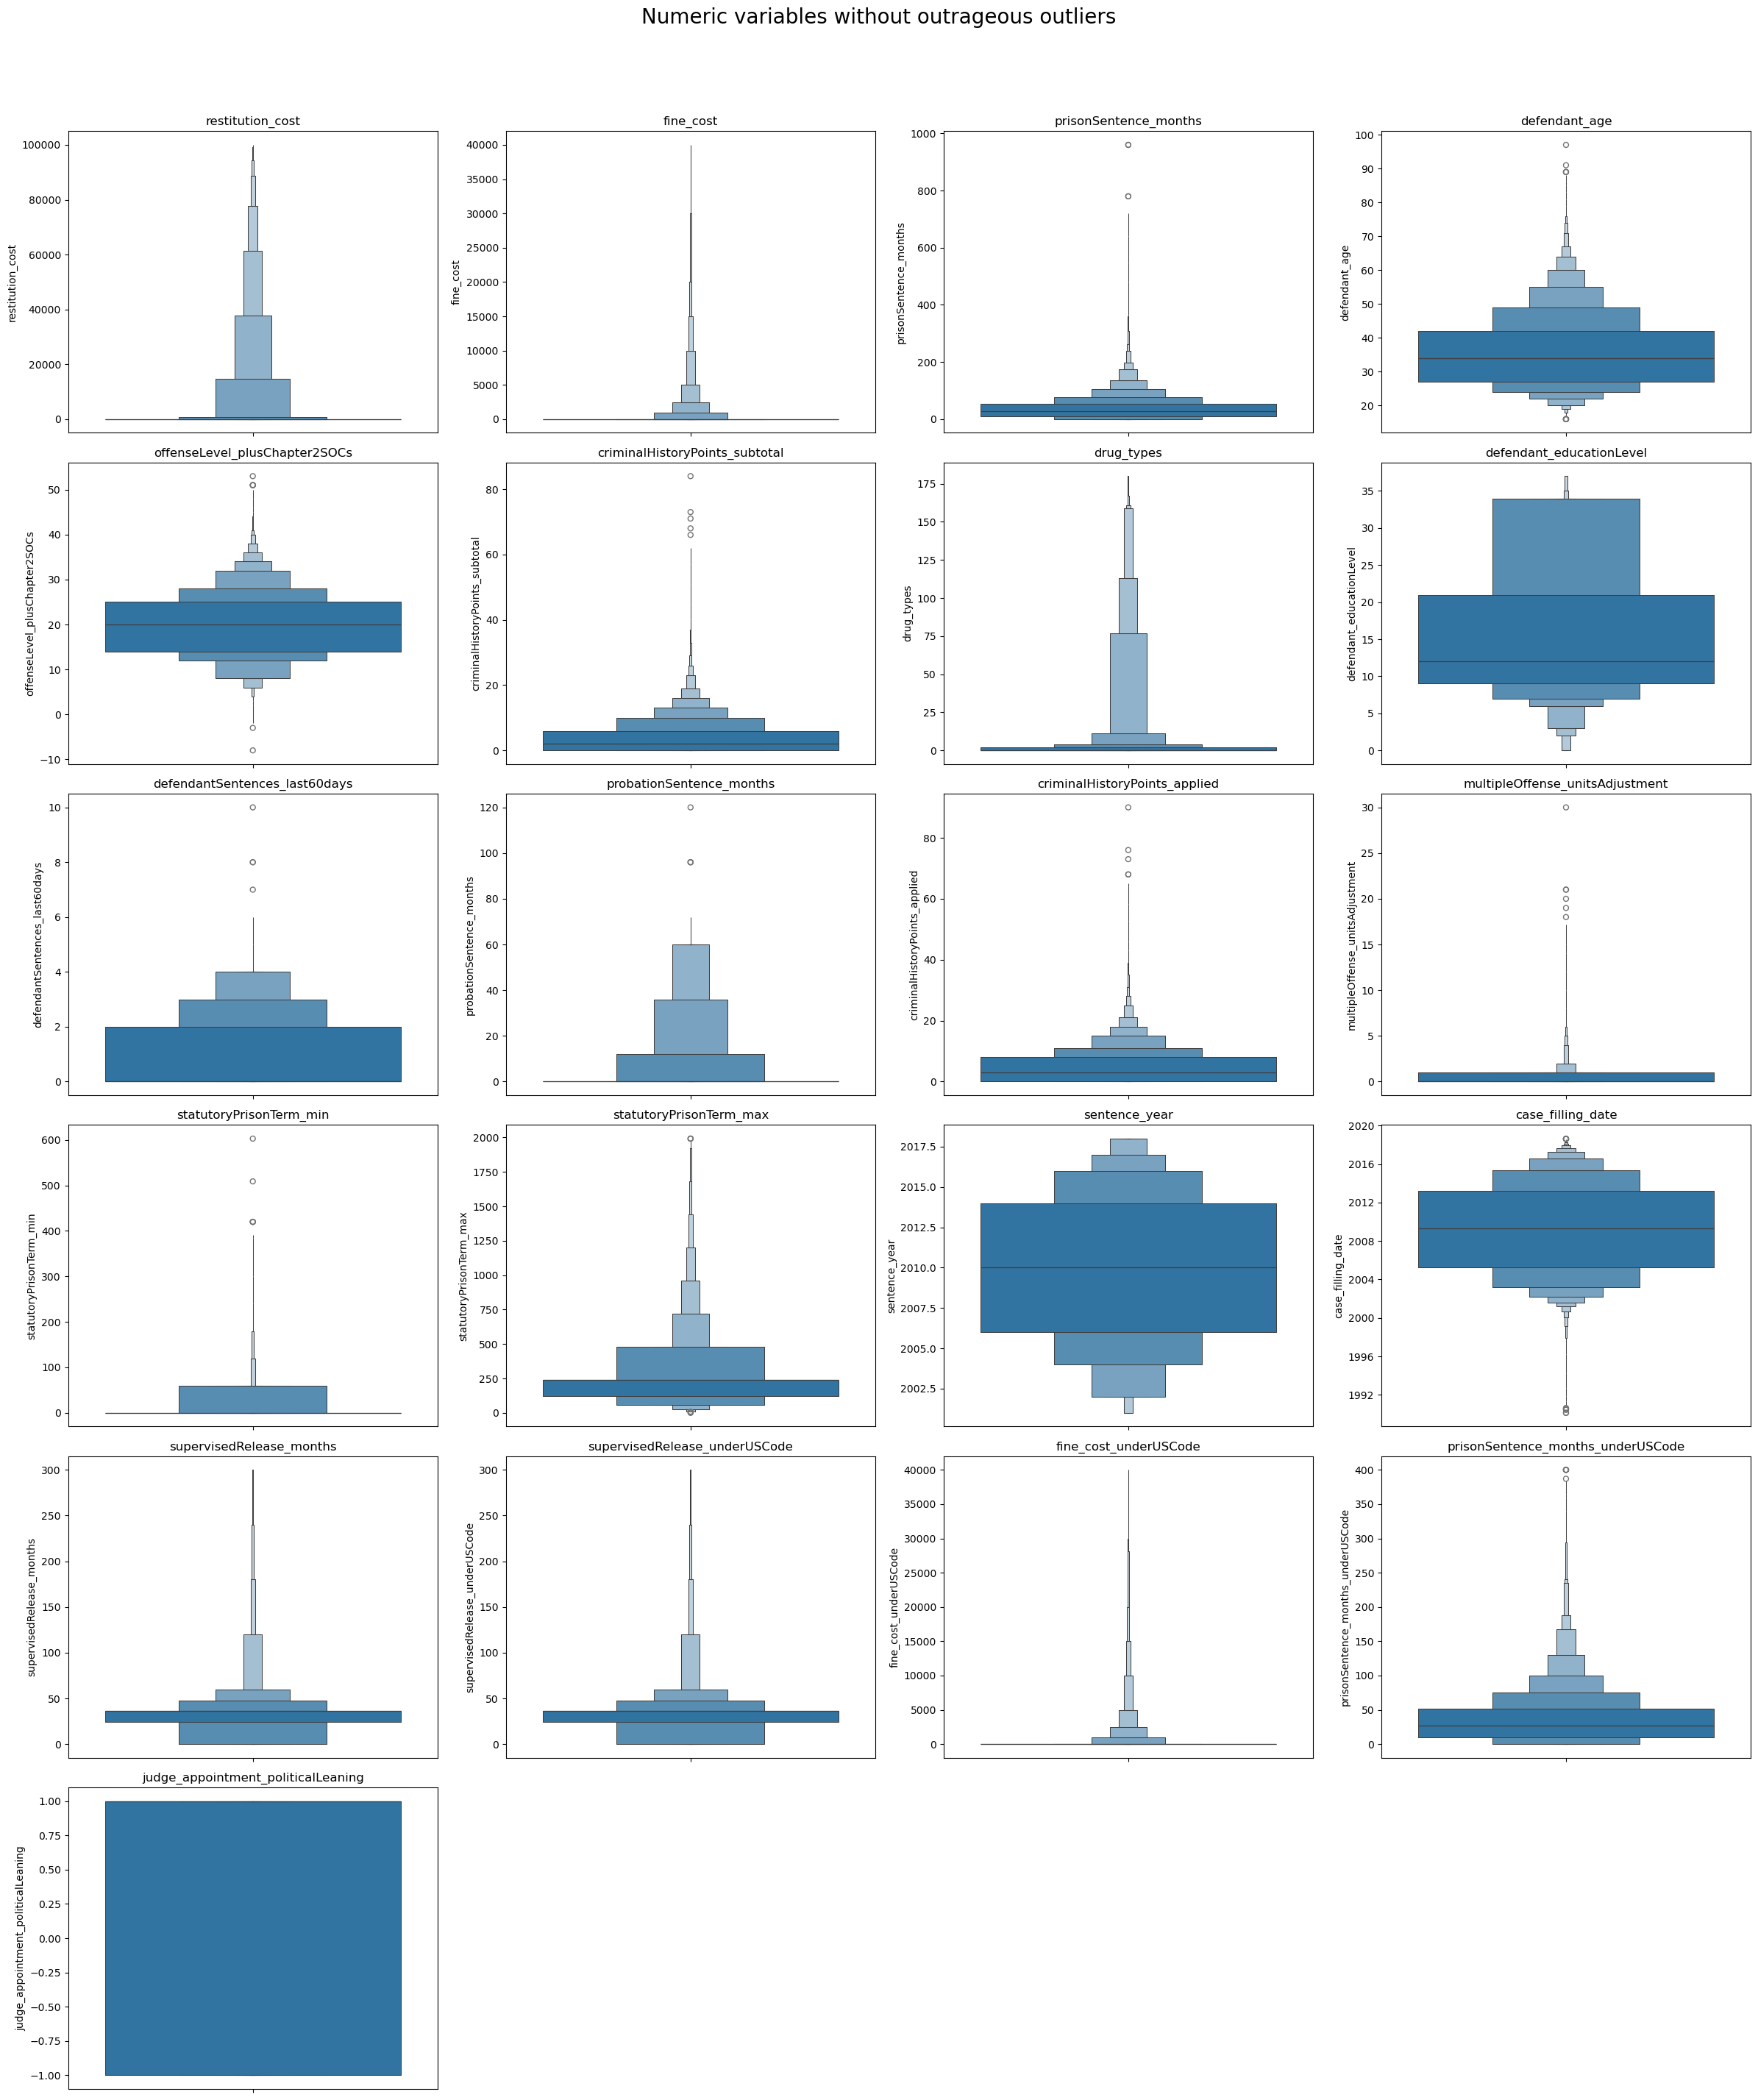

In [95]:
# boxen plots of filtered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxenplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables without outrageous outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Exporting the clean dataset

In [96]:
# Export the cleaned dataset to CSV
prison_sentences.to_csv('./data/prison_sentences_cleaned.csv', index=False)
print(f"Exported cleaned dataset with shape: {prison_sentences.shape}")
print(f"Saved to: ./data/prison_sentences_cleaned.csv")

# written by Claude Sonnet 4 in Copilot using the following prompt:
# "export prison_sentences into a csv file"

Exported cleaned dataset with shape: (380629, 38)
Saved to: ./data/prison_sentences_cleaned.csv
